Collected dataframes from all participants and analyses

In [1]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

In [2]:
in_directory = './dataframes/'

In [19]:
! dir dataframes

 Datentr„ger in Laufwerk C: ist Acer
 Volumeseriennummer: BC07-5B18

 Verzeichnis von C:\Users\User\S_sprechstile_eigene\dataframes

13.07.2021  14:32    <DIR>          .
13.07.2021  14:32    <DIR>          ..
06.07.2021  14:23            14.390 anghelescu_df.pkl
06.07.2021  14:23            17.704 burkhardt_df.pkl
13.07.2021  14:32            13.674 conle_df.pkl
06.07.2021  14:23            13.046 df_haubenreiser.pkl
06.07.2021  14:23            13.836 fleschner_df.pkl
13.07.2021  14:31            11.344 junack_df.pkl
13.07.2021  14:31            14.013 mettig_df.pkl
06.07.2021  14:23            12.461 mueller_df.pkl
06.07.2021  14:23            15.588 nellesen_df.pkl
13.07.2021  14:32            12.992 puder_df.pkl
13.07.2021  14:32            15.027 sucker_df.pkl
06.07.2021  14:23            16.095 wannenmacher_df.pkl
06.07.2021  14:23            14.011 wegner_df.pkl
06.07.2021  14:23            13.417 wendel_df.pkl
              14 Datei(en),        197.598 Bytes
               2 V

In [21]:
if not os.path.isfile('all_participants_data.pkl'):
    df = pd.DataFrame()
    for file in glob.glob(in_directory+'*.pkl'): #glob geht durch und sucht dort alle pkl datein und erzeugt neue
        print(file)
        df_tmp = pd.read_pickle(file)
        df = df.append(df_tmp)
        df.to_pickle('all_participants_data.pkl')
else:
    df = pd.read_pickle('all_participants_data.pkl')

In [4]:
df.shape

(507, 35)

In [5]:
df.head()

,valence,speaker,sex,duration,meanF0Hz,stdevF0Hz,HNR,localJitter,localabsoluteJitter,rapJitter,...,f4_median,pF,fdisp,avgFormant,mff,fitch_vtl,delta_f,vtl_delta_f,JitterPCA,ShimmerPCA
file,,,,,,,,,,,,,,,,,,,,,
Angehelescu_16_seg_00000000.wav,4.0,irina,female,4.28,253.775735,21.862605,9.477288,0.020626,0.000081,0.011053,...,3890.653335,0.034499,1128.602727,2189.947411,1724.099350,16.258670,1100.541549,15.901262,NaN,NaN
Angehelescu_16_seg_00000001.wav,4.0,irina,female,5.96,230.974964,39.822558,9.240131,0.024346,0.000106,0.012157,...,3865.271638,0.197979,1096.403603,2208.987168,1788.838185,15.664861,1099.272751,15.919616,NaN,NaN
Angehelescu_16_seg_00000002.wav,4.0,irina,female,6.96,217.720590,40.656277,11.302664,0.017945,0.000082,0.008597,...,3863.210498,-0.734963,1124.081020,2132.891562,1672.220935,16.765487,1076.734110,16.252852,NaN,NaN
Angehelescu_16_seg_00000003.wav,4.0,irina,female,6.96,223.013685,40.045658,10.033796,0.016122,0.000072,0.007982,...,3889.489510,0.230677,1098.321195,2211.255038,1798.267563,15.587988,1100.690985,15.899104,NaN,NaN
Angehelescu_16_seg_00000004.wav,3.0,irina,female,1.66,232.001187,25.032989,14.639509,0.014489,0.000063,0.007420,...,3878.346306,0.210506,1122.512046,2203.411591,1740.302593,16.106597,1104.395672,15.845770,NaN,NaN


In [22]:
#neu
df.speaker.unique()

array(['irina', 'felix', 'luise', 'saskia', 'lea', 'alicia', 'nina',
       'jannis', 'Carolin-Antonia', 'sophie', 'lisa', 'tobias'],
      dtype=object)

<AxesSubplot:>

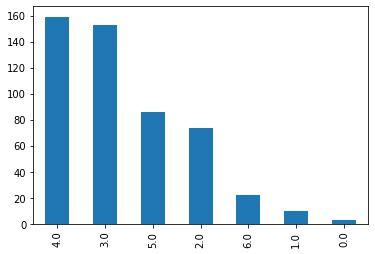

In [6]:
df.valence.value_counts().plot(kind='bar')

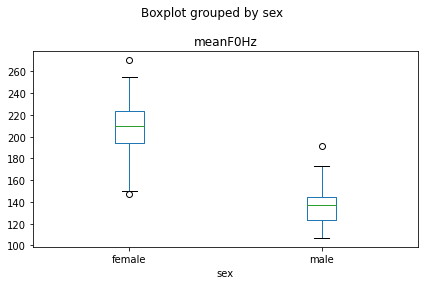

In [7]:
df.boxplot(by = 'sex', column = 'meanF0Hz', grid = False)
plt.tight_layout()


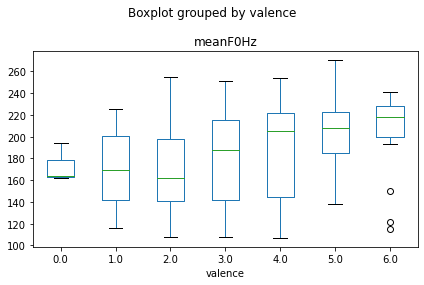

In [8]:
df.boxplot(by = 'valence', column = 'meanF0Hz', grid = False)
plt.tight_layout()

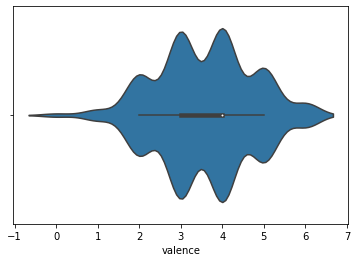

In [9]:
ax=sns.violinplot(x=df.valence)

In [10]:
#replace Nans with mean valuae
        
for i, col in enumerate(df.iloc[:,3:].columns):
    if np.isnan(df[col]).any():
        print()
        print('{}includes {} nan, I\'ll insert mean values'.format(col, df[col].isna().sum()))
        df[col] = df[col].fillna(df[col].mean())
   


durationincludes 61 nan, I'll insert mean values

meanF0Hzincludes 61 nan, I'll insert mean values

stdevF0Hzincludes 61 nan, I'll insert mean values

HNRincludes 61 nan, I'll insert mean values

localJitterincludes 61 nan, I'll insert mean values

localabsoluteJitterincludes 61 nan, I'll insert mean values

rapJitterincludes 61 nan, I'll insert mean values

ppq5Jitterincludes 61 nan, I'll insert mean values

ddpJitterincludes 61 nan, I'll insert mean values

localShimmerincludes 61 nan, I'll insert mean values

localdbShimmerincludes 61 nan, I'll insert mean values

apq3Shimmerincludes 62 nan, I'll insert mean values

apq5Shimmerincludes 62 nan, I'll insert mean values

apq11Shimmerincludes 64 nan, I'll insert mean values

ddaShimmerincludes 62 nan, I'll insert mean values

f1_meanincludes 61 nan, I'll insert mean values

f2_meanincludes 61 nan, I'll insert mean values

f3_meanincludes 61 nan, I'll insert mean values

f4_meanincludes 61 nan, I'll insert mean values

f1_medianincludes

c:\users\user\s_sprechstile_eigene\venv\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


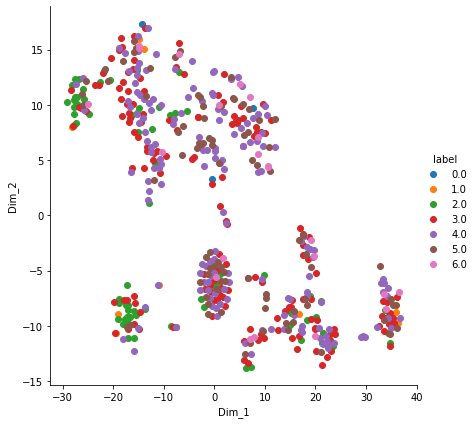

In [11]:
# Plot a TSNE
def plotTsne(feats, labels, perplexity=30, learning_rate=200):
    model = TSNE(n_components=2, random_state=0, perplexity=perplexity, learning_rate=learning_rate)
    tsne_data = model.fit_transform(feats)
    tsne_data_labs = np.vstack((tsne_data.T, labels)).T
    tsne_df = pd.DataFrame(data=tsne_data_labs, columns=('Dim_1', 'Dim_2', 'label'))
    sns.FacetGrid(tsne_df, hue='label', size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
    plt.show()
plotTsne(df.iloc[:,3:], df['valence'], 30, 200)
# features ab der 3. Spalte[]
# 